In [132]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter

import os

In [133]:
from pathlib import Path

# Configurable parts
SYMBOL = "USDJPY"
SAMPLE_TYPE = "time"
MINUTES = 15

START_DATE = "20240101"
END_DATE = "20241231"

# Build base name
RESAMPLED_NAME = f"{SYMBOL}-{MINUTES}m-{START_DATE}-{END_DATE}"

# Base directories
BASE_DIR = Path("../data")
RESAMPLED_DIR = BASE_DIR / "resampled"
PROCESSED_DIR = BASE_DIR / "processed"
EVENTS_DIR = BASE_DIR / "events"

# Final paths
RESAMPLED_FILE_PATH = RESAMPLED_DIR / f"{RESAMPLED_NAME}.pkl"
PROCESSED_FILE_PATH = PROCESSED_DIR / f"{RESAMPLED_NAME}_processed.pkl"

In [134]:
%%time
df = pd.read_pickle(PROCESSED_FILE_PATH)

CPU times: user 1.15 ms, sys: 1.77 ms, total: 2.92 ms
Wall time: 3.19 ms


In [135]:
df.shape

(21642, 10)

In [136]:
df.head()

,open,high,low,close,volume,spread,return,log_return,fd_return,log_fd_return
timestamp,,,,,,,,,,
2024-02-18 23:00:00,1.077570,1.078030,1.077555,1.078015,1.784510e+12,0.000069,0.000435,0.000404,0.167941,0.011969
2024-02-18 23:15:00,1.078010,1.078175,1.077955,1.078170,9.272000e+11,0.000032,0.000155,0.000144,0.168000,0.012025
2024-02-18 23:30:00,1.078155,1.078230,1.078055,1.078230,1.681190e+12,0.000031,0.000060,0.000056,0.167989,0.012014
2024-02-18 23:45:00,1.078225,1.078515,1.078195,1.078415,1.629270e+12,0.000030,0.000185,0.000172,0.168124,0.012139
2024-02-19 00:00:00,1.078395,1.078780,1.078380,1.078775,2.773220e+12,0.000030,0.000360,0.000334,0.168415,0.012409


In [137]:
df.columns

Index(['open', 'high', 'low', 'close', 'volume', 'spread', 'return',
       'log_return', 'fd_return', 'log_fd_return'],
      dtype='object')

In [138]:
EVENT_NAME = 'ZIGZAG'
LEGS = 5
THRESHOLD = .1
EVENT_PATH = EVENTS_DIR / f"{RESAMPLED_NAME}_ZIGZAGs_{THRESHOLD}%_{LEGS}.pkl"

## Applying ZigZag

In [139]:
import pandas_ta as ta

In [140]:
help(ta.zigzag)

Help on function zigzag in module pandas_ta.trend.zigzag:

zigzag(high: pandas.core.series.Series, low: pandas.core.series.Series, close: pandas.core.series.Series = None, legs: int = None, deviation: Union[int, numpy.integer, float, numpy.floating] = None, backtest: bool = None, offset: Union[int, numpy.integer] = None, **kwargs: Optional[dict])
    Zigzag

    This indicator attempts to filter out smaller movements while identifying
    trend direction. It does not predict future trends, but it does identify
    swing highs and lows.

    Sources:
        * [stockcharts](https://school.stockcharts.com/doku.php?id=technical_indicators:zigzag)
        * [tradingview](https://www.tradingview.com/support/solutions/43000591664-zig-zag/#:~:text=Definition,trader%20visual%20the%20price%20action.)

    Parameters:
        high (Series): ```high``` Series
        low (Series): ```low``` Series
        close (Series): ```close``` Series. Default: ```None```
        legs (int): Number of legs (

In [141]:
zigzag = df.ta.zigzag(legs=LEGS, deviation=THRESHOLD)

In [142]:
t_events = zigzag[zigzag[f"ZIGZAGs_{THRESHOLD}%_{LEGS}"]==True].index
t_events

DatetimeIndex(['2024-02-19 00:30:00', '2024-02-19 07:15:00',
               '2024-02-19 18:15:00', '2024-02-20 10:30:00',
               '2024-02-20 14:30:00', '2024-02-21 04:00:00',
               '2024-02-21 15:00:00', '2024-02-21 16:45:00',
               '2024-02-21 19:00:00', '2024-02-22 00:45:00',
               ...
               '2024-12-27 12:00:00', '2024-12-27 14:00:00',
               '2024-12-27 15:45:00', '2024-12-29 23:00:00',
               '2024-12-30 06:30:00', '2024-12-30 12:00:00',
               '2024-12-30 13:00:00', '2024-12-30 14:45:00',
               '2024-12-30 18:45:00', '2024-12-30 23:00:00'],
              dtype='datetime64[ns]', name='timestamp', length=927, freq=None)

## Plotting the results

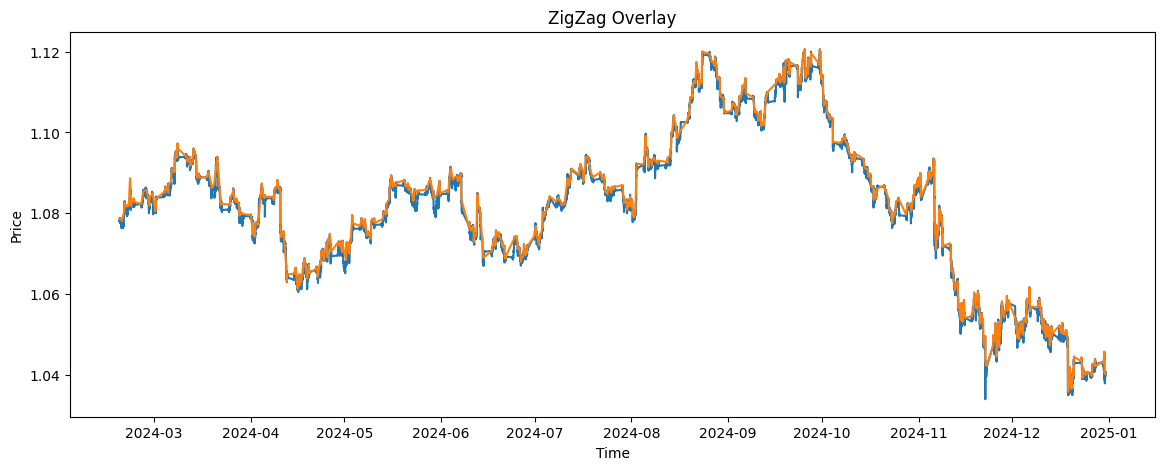

In [143]:
# Using the outputs from (2)
plt.figure(figsize=(14,5))
plt.plot(df.index, df['close'])
plt.plot(t_events, df['close'].loc[t_events])  # connective segments
plt.title('ZigZag Overlay')
plt.xlabel('Time'); plt.ylabel('Price')
plt.show()

### Saving File

In [144]:
EVENT_PATH

PosixPath('../data/events/USDJPY-15m-20240101-20241231_ZIGZAGs_0.1%_5.pkl')

In [145]:
t_events.to_series().to_pickle(EVENT_PATH)